In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [9]:
# load dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
           skiprows=22, header=None)
print(raw_df)

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

In [10]:
X = np.hstack([raw_df.values[::2, :],raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [11]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=1)

In [12]:
# Method 1: sklearn model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
diff_1 = sum((reg.predict(X_test) - y_test) ** 2)
print(diff_1)

5116.772264580468


In [14]:
# Method 2: mathemedical
# need to add a column of 1
X_train_2 = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
theta = np.linalg.inv(X_train_2.T @ X_train_2) @ (X_train_2.T) @ y_train 
X_test_2 = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
pred =  X_test_2 @ theta

method1 5116.772264580468 method2 5116.772264580765


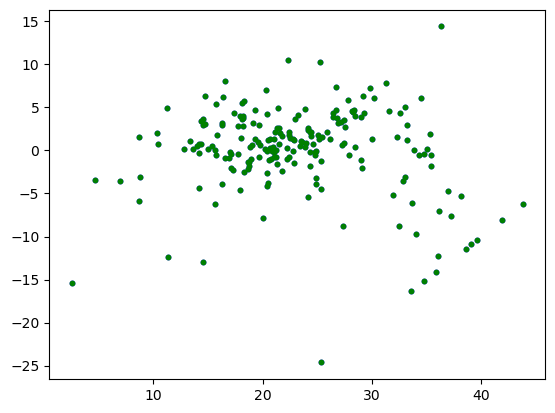

In [15]:
# eval and compare
diff_2 = sum((pred - y_test)**2)
print("method1", diff_1, "method2", diff_2)

# plotting residual errors for method 1
plt.scatter(pred,
            pred - y_test,
            color="blue", s=10,
            label='method 1')

# plotting residual errors for method 2
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="green", s=10,
            label='method 2')
